In [2]:
%cd /media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/

/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels


In [2]:
import pandas as pd
#from functions import *
import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from pycaret.regression import *

In [3]:

#data0 = pd.read_excel('data/raw/Fundos2023maisretorno.xlsx', index_col=0, skiprows=3)
data0_0 = pd.read_csv('data/raw/dez2023.csv')
data0_1 = pd.read_csv('data/raw/jan2024.csv')
data0_2 = pd.read_csv('data/raw/fev2024.csv')
data0_3 = pd.read_csv('data/raw/mar2024.csv')

feat_drop = ['Nome do fundo', 'CNPJ do fundo', 'cnpj', 'Classe N1',
             'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
             'Drawdown máximo']

In [4]:
cnpj0 = data0_0['CNPJ do fundo'].loc[ (data0_0['Cotistas'] > 100) & (data0_0['Classe N1'] == 'Ações')].values
cnpj1 = data0_1['CNPJ do fundo'].loc[ (data0_1['Cotistas'] > 100) & (data0_1['Classe N1'] == 'Ações')].values
cnpj2 = data0_2['CNPJ do fundo'].loc[ (data0_2['Cotistas'] > 100) & (data0_2['Classe N1'] == 'Ações')].values
cnpj3 = data0_3['CNPJ do fundo'].loc[ (data0_3['Cotistas'] > 100) & (data0_3['Classe N1'] == 'Ações')].values

In [228]:
set1 = set(cnpj0)
set2 = set(cnpj1)
matches01 = list(set1.intersection(set2))
data0  = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)]
rent1M = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data0 = data0.merge(rent1M, how='inner', on='CNPJ do fundo')

In [229]:
set1 = set(cnpj1)
set2 = set(cnpj2)
matches01 = list(set1.intersection(set2))
data1  = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)]
rent1M = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data1 = data1.merge(rent1M, how='inner', on='CNPJ do fundo')

In [232]:
set1 = set(cnpj2)
set2 = set(cnpj3)
matches01 = list(set1.intersection(set2))
data2  = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)]
rent1M = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data2 = data2.merge(rent1M, how='inner', on='CNPJ do fundo')

In [233]:
data = pd.concat([data0, data1, data2], ignore_index=True)
data.dropna(axis=0, inplace=True)
data

,Nome do fundo,CNPJ do fundo,cnpj,Classe N1,Patrimônio líquido,Cotistas,Valor da cota,Variação da Cota,Drawdown máximo,Rentabilidade No mês,...,Índice de sortino 120 meses,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Rentabilidade 1M
0,TEMPO CAPITAL MANACÁ FIC FIA,906044000185,906044000185,Ações,5.331529e+08,144.0,506.384278,0.999964,0.471904,0.063432,...,0.249702,0.668736,0.590322,0.232708,0.457210,0.045925,0.045482,0.017580,0.041893,-0.037351
1,ITAÚ SMALL CAP VALUATION FIC FIA,1063897000165,1063897000165,Ações,4.163146e+08,8999.0,145.861917,0.999935,0.697280,0.074498,...,-0.094278,-0.531725,-0.493345,-0.160503,-0.209747,-0.063062,-0.063401,-0.020358,-0.032751,-0.057636
2,CSHG TOP AÇÕES FIC FIA,1608399000150,1608399000150,Ações,6.227542e+07,165.0,60.546143,0.999532,0.649395,0.051494,...,0.039968,-0.408554,-0.315260,-0.253826,-0.021597,-0.029990,-0.024929,-0.018871,-0.001922,-0.037856
3,MCR PRINCIPAL FIA BDR NÍVEL I,1656101000188,1656101000188,Ações,3.113159e+08,113.0,61.458604,0.999841,0.689950,0.009328,...,0.260465,-0.065957,0.314967,0.476040,0.186629,-0.024839,0.082493,0.118940,0.058137,0.020567
4,BB AÇÕES ENERGIA FI,2020528000158,2020528000158,Ações,2.418587e+08,7497.0,17.717962,0.999924,0.600258,0.062851,...,0.168069,-0.184864,-0.143071,0.064928,0.131140,-0.036985,-0.030922,0.013590,0.027717,-0.045220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,ITAÚ AÇÕES INDEX IBOVESPA FIC FI,67976449000160,67976449000160,Ações,9.991766e+07,2483.0,12.911505,0.991201,0.651763,0.008526,...,-0.010572,-5.824441,-6.920392,-7.881623,-9.556912,-0.014855,-0.015750,-0.016251,-0.015647,-0.008414
2845,ALFAMAIS FIC FIA,56824857000180,56824857000180,Ações,1.384841e+06,2493.0,0.268920,0.991088,0.776051,-0.001198,...,-0.556252,-3.069346,-2.154561,-1.990746,-1.864686,-0.233362,-0.175200,-0.149357,-0.128372,-0.002484
2846,ITAÚ AÇÕES STRATEGY FIC FI,74055922000132,74055922000132,Ações,1.463214e+07,377.0,363.910648,0.991446,0.622456,0.006550,...,-0.068669,-0.828622,-0.981528,-0.723521,-0.767332,-0.038746,-0.045864,-0.032310,-0.027204,-0.006378
2847,ITAÚ AÇÕES IBOVESPA ATIVO FIC FI,67976423000112,67976423000112,Ações,6.255053e+07,595.0,16.030167,0.991502,0.777697,0.007336,...,-0.007760,-0.583304,-0.742787,-0.469042,-0.439997,-0.027400,-0.034859,-0.021036,-0.015656,-0.005533


In [235]:
data.drop(columns=feat_drop, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Índice de sortino 120 meses,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Rentabilidade 1M
0,0.063432,0.162551,0.152240,0.283637,0.324958,0.110319,0.116360,0.126855,0.147489,0.174005,...,0.249702,0.668736,0.590322,0.232708,0.457210,0.045925,0.045482,0.017580,0.041893,-0.037351
1,0.074498,0.108767,0.034856,0.150709,0.041943,0.153674,0.219351,0.196725,0.205506,0.225062,...,-0.094278,-0.531725,-0.493345,-0.160503,-0.209747,-0.063062,-0.063401,-0.020358,-0.032751,-0.057636
2,0.051494,0.121110,0.093450,0.173777,0.215959,0.128384,0.157389,0.151481,0.160325,0.182905,...,0.039968,-0.408554,-0.315260,-0.253826,-0.021597,-0.029990,-0.024929,-0.018871,-0.001922,-0.037856
3,0.009328,0.041471,0.081186,0.043554,0.005057,0.056176,0.069146,0.079373,0.093055,0.137725,...,0.260465,-0.065957,0.314967,0.476040,0.186629,-0.024839,0.082493,0.118940,0.058137,0.020567
4,0.062851,0.104959,0.034513,0.165055,0.178681,0.108030,0.173288,0.154330,0.162932,0.177211,...,0.168069,-0.184864,-0.143071,0.064928,0.131140,-0.036985,-0.030922,0.013590,0.027717,-0.045220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,0.008526,0.009829,0.090006,0.219506,0.126052,0.147027,0.132832,0.146756,0.159573,0.190037,...,-0.010572,-5.824441,-6.920392,-7.881623,-9.556912,-0.014855,-0.015750,-0.016251,-0.015647,-0.008414
1087,-0.001198,0.005155,0.073624,0.158917,-0.214027,0.128773,0.124416,0.138134,0.152219,0.185158,...,-0.556252,-3.069346,-2.154561,-1.990746,-1.864686,-0.233362,-0.175200,-0.149357,-0.128372,-0.002484
1088,0.006550,0.002418,0.069846,0.198901,0.096558,0.147057,0.135088,0.147830,0.155002,0.184016,...,-0.068669,-0.828622,-0.981528,-0.723521,-0.767332,-0.038746,-0.045864,-0.032310,-0.027204,-0.006378
1089,0.007336,0.004868,0.075214,0.211160,0.119807,0.146854,0.134897,0.147623,0.154768,0.183797,...,-0.007760,-0.583304,-0.742787,-0.469042,-0.439997,-0.027400,-0.034859,-0.021036,-0.015656,-0.005533


In [30]:
import pandas as pd
#from functions import *
import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from pycaret.regression import *
                

dta0_01 = pd.read_csv('data/raw/jan2023.csv')
dta0_02 = pd.read_csv('data/raw/fev2023.csv')
dta0_03 = pd.read_csv('data/raw/mar2023.csv')
dta0_04 = pd.read_csv('data/raw/abr2023.csv')
dta0_05 = pd.read_csv('data/raw/mai2023.csv')
dta0_06 = pd.read_csv('data/raw/jun2023.csv')
dta0_07 = pd.read_csv('data/raw/jul2023.csv')
dta0_08 = pd.read_csv('data/raw/ago2023.csv')
dta0_09 = pd.read_csv('data/raw/set2023.csv')
dta0_10 = pd.read_csv('data/raw/out2023.csv')
dta0_11 = pd.read_csv('data/raw/nov2023.csv')
data0_0 = pd.read_csv('data/raw/dez2023.csv')
data0_1 = pd.read_csv('data/raw/jan2024.csv')
data0_2 = pd.read_csv('data/raw/fev2024.csv')
data0_3 = pd.read_csv('data/raw/mar2024.csv')
data0_4 = pd.read_csv('data/raw/abr2024.csv')
data0_5 = pd.read_csv('data/raw/mai2024.csv')

feat_drop = ['Nome do fundo','cnpj', 'Classe N1',
        'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
        'Drawdown máximo']

cpj01 = dta0_01['CNPJ do fundo'].loc[ (dta0_01['Cotistas'] > 100) & (dta0_01['Classe N1'] == 'Ações')].values
cpj02 = dta0_02['CNPJ do fundo'].loc[ (dta0_02['Cotistas'] > 100) & (dta0_02['Classe N1'] == 'Ações')].values
cpj03 = dta0_03['CNPJ do fundo'].loc[ (dta0_03['Cotistas'] > 100) & (dta0_03['Classe N1'] == 'Ações')].values
cpj04 = dta0_04['CNPJ do fundo'].loc[ (dta0_04['Cotistas'] > 100) & (dta0_04['Classe N1'] == 'Ações')].values
cpj05 = dta0_05['CNPJ do fundo'].loc[ (dta0_05['Cotistas'] > 100) & (dta0_05['Classe N1'] == 'Ações')].values     
cpj06 = dta0_06['CNPJ do fundo'].loc[ (dta0_06['Cotistas'] > 100) & (dta0_06['Classe N1'] == 'Ações')].values     
cpj07 = dta0_07['CNPJ do fundo'].loc[ (dta0_07['Cotistas'] > 100) & (dta0_07['Classe N1'] == 'Ações')].values        
cpj08 = dta0_08['CNPJ do fundo'].loc[ (dta0_08['Cotistas'] > 100) & (dta0_08['Classe N1'] == 'Ações')].values        
cpj09 = dta0_09['CNPJ do fundo'].loc[ (dta0_09['Cotistas'] > 100) & (dta0_09['Classe N1'] == 'Ações')].values        
cpj10 = dta0_10['CNPJ do fundo'].loc[ (dta0_10['Cotistas'] > 100) & (dta0_10['Classe N1'] == 'Ações')].values        
cpj11 = dta0_11['CNPJ do fundo'].loc[ (dta0_11['Cotistas'] > 100) & (dta0_11['Classe N1'] == 'Ações')].values
cnpj0 = data0_0['CNPJ do fundo'].loc[ (data0_0['Cotistas'] > 100) & (data0_0['Classe N1'] == 'Ações')].values
cnpj1 = data0_1['CNPJ do fundo'].loc[ (data0_1['Cotistas'] > 100) & (data0_1['Classe N1'] == 'Ações')].values
cnpj2 = data0_2['CNPJ do fundo'].loc[ (data0_2['Cotistas'] > 100) & (data0_2['Classe N1'] == 'Ações')].values
cnpj3 = data0_3['CNPJ do fundo'].loc[ (data0_3['Cotistas'] > 100) & (data0_3['Classe N1'] == 'Ações')].values
cnpj4 = data0_4['CNPJ do fundo'].loc[ (data0_4['Cotistas'] > 100) & (data0_4['Classe N1'] == 'Ações')].values
cnpj5 = data0_5['CNPJ do fundo'].loc[ (data0_5['Cotistas'] > 100) & (data0_5['Classe N1'] == 'Ações')].values

set1 = set(cpj01)
set2 = set(cpj02)
matches01 = list(set1.intersection(set2))
dta01  = dta0_01.loc[dta0_01['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
dta01 = dta01.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj02)
set2 = set(cpj03)
matches01 = list(set1.intersection(set2))
dta02  = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
dta02 = dta02.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj03)
set2 = set(cpj04)
matches01 = list(set1.intersection(set2))
dta03  = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
dta03 = dta03.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj04)
set2 = set(cpj05)
matches01 = list(set1.intersection(set2))
dta04  = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
dta04 = dta04.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cpj05)
set2 = set(cpj06)
matches01 = list(set1.intersection(set2))
dta05  = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
dta05 = dta05.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj06)
set2 = set(cpj07)
matches01 = list(set1.intersection(set2))
dta06  = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
dta06 = dta06.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj07)
set2 = set(cpj08)
matches01 = list(set1.intersection(set2))
dta07  = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
dta07 = dta07.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj08)
set2 = set(cpj09)
matches01 = list(set1.intersection(set2))
dta08  = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
dta08 = dta08.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj09)
set2 = set(cpj10)
matches01 = list(set1.intersection(set2))
dta09  = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
dta09 = dta09.merge(rent1M, how='inner', on='CNPJ do fundo')
                
set1 = set(cpj10)
set2 = set(cpj11)
matches01 = list(set1.intersection(set2))
dta10  = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
dta10 = dta10.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj11)
set2 = set(cnpj0)
matches01 = list(set1.intersection(set2))
dta11  = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)]
rent1M = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
dta11 = dta11.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cnpj0)
set2 = set(cnpj1)
matches01 = list(set1.intersection(set2))
data0  = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)]
rent1M = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
data0 = data0.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj1)
set2 = set(cnpj2)
matches01 = list(set1.intersection(set2))
data1  = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)]
rent1M = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
data1 = data1.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj2)
set2 = set(cnpj3)
matches01 = list(set1.intersection(set2))
data2  = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)]
rent1M = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade 6 meses']]
rent1M['Rentabilidade 6M'] = rent1M['Rentabilidade 6 meses']
rent1M.drop(columns='Rentabilidade 6 meses', inplace=True)
data2 = data2.merge(rent1M, how='inner', on='CNPJ do fundo')

data = pd.concat([ dta01, dta02, dta03, dta04, dta05, dta06, dta07, dta08, dta09, dta10, dta11, data0, data1, data2], ignore_index=True)

In [31]:
data.dropna(axis=0, inplace=True)
data.drop(columns=feat_drop, inplace=True)
data.reset_index(drop=True, inplace=True)

data['Cluster'] = 0
data['Cluster'].loc[ data['Rentabilidade 3 meses'] < (data['Rentabilidade 3 meses'].mean() - 0.5*data['Rentabilidade 3 meses'].std())] = -1.0
data['Cluster'].loc[ data['Rentabilidade 3 meses'] > (data['Rentabilidade 3 meses'].mean() + 0.5*data['Rentabilidade 3 meses'].std())] =  1.0

data.drop(columns='Rentabilidade 6M', inplace=True)
data

,CNPJ do fundo,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,...,Índice de sortino 120 meses,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster
0,13950062000106,0.045134,-0.117370,0.050586,-0.070121,-0.227474,0.190753,0.228272,0.204698,0.196921,...,0.116079,-0.455287,0.329760,0.266957,0.210171,-0.075142,0.054027,0.046860,0.062370,-1
1,3929711000133,0.047141,-0.012793,0.068865,0.291692,0.992360,0.408596,0.404824,0.434350,0.396246,...,0.065527,0.659993,0.420368,0.453069,0.136915,0.166551,0.098733,0.107923,0.030779,0
2,3904236000140,0.046392,-0.014381,0.065438,0.283348,0.967376,0.408141,0.404529,0.434264,0.396307,...,0.061409,0.638095,0.397610,0.429924,0.132156,0.161023,0.093387,0.102419,0.029766,0
3,3917776000169,0.047704,-0.013920,0.066603,0.285244,0.970398,0.409088,0.405237,0.434668,0.396849,...,0.063579,0.640010,0.400717,0.433043,0.134170,0.161618,0.094179,0.103239,0.030248,0
4,3914671000156,0.047510,-0.010284,0.068547,0.287934,0.975874,0.408691,0.405568,0.435969,0.398081,...,0.073128,0.644709,0.404274,0.436656,0.144700,0.162762,0.094991,0.104080,0.032563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,67976449000160,0.008526,0.009829,0.090006,0.219506,0.126052,0.147027,0.132832,0.146756,0.159573,...,-0.010572,-5.824441,-6.920392,-7.881623,-9.556912,-0.014855,-0.015750,-0.016251,-0.015647,0
4966,56824857000180,-0.001198,0.005155,0.073624,0.158917,-0.214027,0.128773,0.124416,0.138134,0.152219,...,-0.556252,-3.069346,-2.154561,-1.990746,-1.864686,-0.233362,-0.175200,-0.149357,-0.128372,0
4967,74055922000132,0.006550,0.002418,0.069846,0.198901,0.096558,0.147057,0.135088,0.147830,0.155002,...,-0.068669,-0.828622,-0.981528,-0.723521,-0.767332,-0.038746,-0.045864,-0.032310,-0.027204,0
4968,67976423000112,0.007336,0.004868,0.075214,0.211160,0.119807,0.146854,0.134897,0.147623,0.154768,...,-0.007760,-0.583304,-0.742787,-0.469042,-0.439997,-0.027400,-0.034859,-0.021036,-0.015656,0


<Axes: >

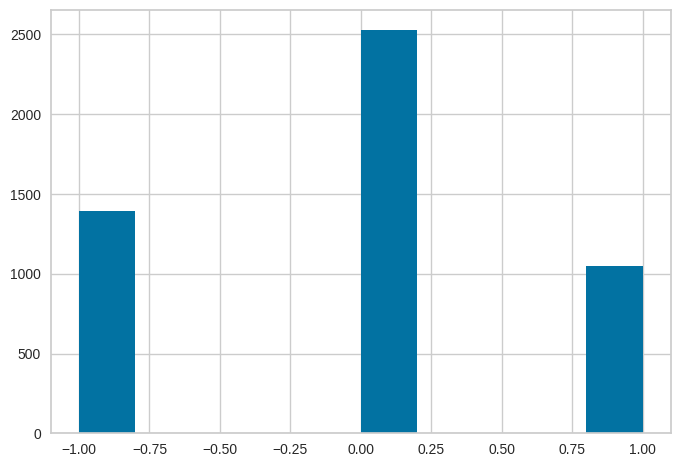

In [29]:
data['Cluster'].hist()

<Axes: >

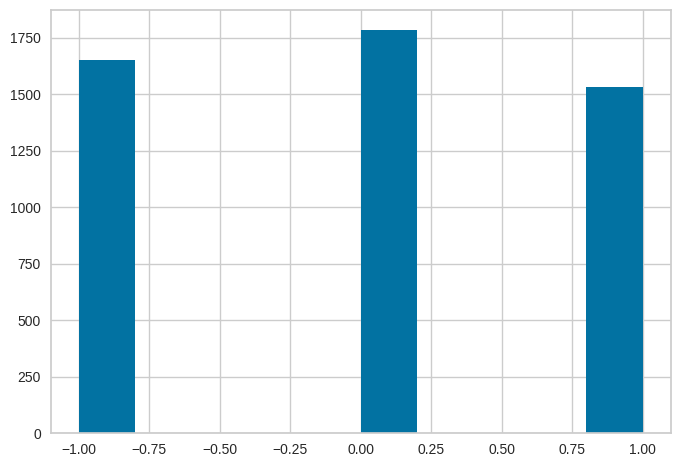

In [32]:
data['Cluster'].hist()

In [185]:
data['Rentabilidade 3 meses'].min()

-0.60993

In [184]:
data['Rentabilidade 3 meses'].std()

0.12015921732271412

In [21]:
data['Rentabilidade 3 meses'].max()

1.004956

<Axes: >

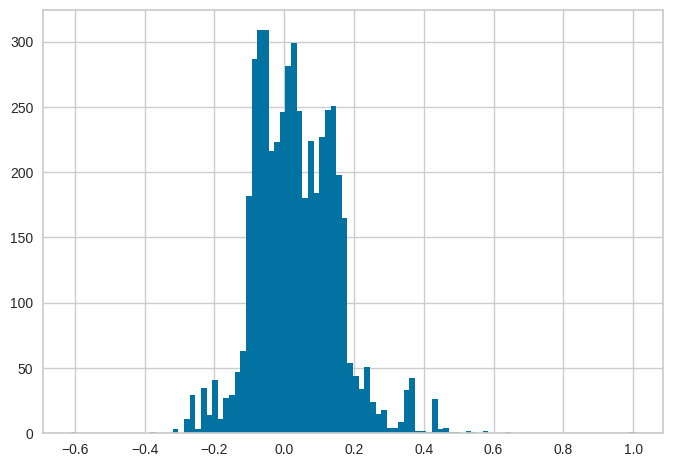

In [131]:
data['Rentabilidade 3 meses'].hist(bins=100)

<Axes: >

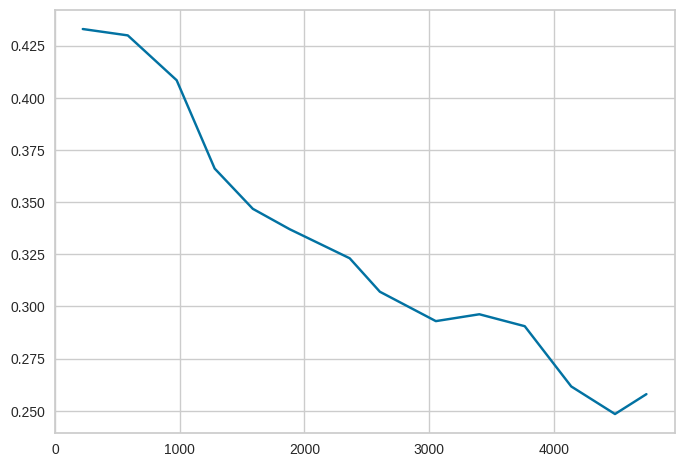

In [26]:
#(data['Volatilidade No mês'].loc[ data['CNPJ do fundo'] == 8336054000134 ]).plot()
data['Volatilidade 6 meses'].loc[ data['CNPJ do fundo'] == 8336054000134 ].plot()
#data['Volatilidade 3 meses'].loc[ data['CNPJ do fundo'] == 8336054000134 ].plot()

In [17]:
data.loc[ data['CNPJ do fundo'] == 8336054000134 ]


,CNPJ do fundo,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,...,Índice de sortino 120 meses,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Rentabilidade 6M
223,8336054000134,0.061076,-0.003206,0.065805,0.333016,0.928760,0.401812,0.398719,0.432943,0.391263,...,0.070174,0.703240,0.544491,0.500815,0.143406,0.180595,0.129198,0.120008,0.031895,-0.156276
584,8336054000134,-0.031836,0.002443,-0.156276,0.252869,1.334853,0.360742,0.387293,0.429893,0.395832,...,0.086509,0.796504,0.516880,0.507711,0.168273,0.205251,0.122991,0.122090,0.037475,-0.101672
976,8336054000134,-0.070622,-0.045253,-0.101672,0.199251,0.999816,0.308832,0.336380,0.408405,0.388411,...,0.042578,1.179298,0.438174,0.459173,0.126926,0.292279,0.104735,0.110905,0.028292,-0.069530
1281,8336054000134,0.131442,0.035824,-0.069530,0.348498,1.215130,0.333871,0.332616,0.366084,0.391138,...,0.042830,1.180402,0.559647,0.500902,0.114813,0.284233,0.134488,0.121825,0.025639,0.142686
1587,8336054000134,0.091902,0.145483,0.142686,0.333743,1.095591,0.300154,0.315338,0.346793,0.387152,...,0.061699,1.186883,0.686650,0.785311,0.116838,0.282626,0.166224,0.180757,0.026114,0.403564
1882,8336054000134,0.189948,0.470091,0.403564,0.662484,1.343101,0.376057,0.333412,0.337039,0.390234,...,0.181122,1.351524,0.757235,0.785045,0.178898,0.322534,0.184703,0.180561,0.039996,0.407136
2364,8336054000134,0.049165,0.363187,0.407136,0.479132,1.569122,0.286364,0.314070,0.323097,0.385975,...,0.181391,1.402168,0.858148,0.738027,0.182971,0.332110,0.208830,0.169755,0.040818,0.515858
2606,8336054000134,0.059981,0.284485,0.515858,0.303815,1.648949,0.233485,0.298908,0.307066,0.371022,...,0.201562,1.546052,0.952636,0.838329,0.229759,0.364630,0.231836,0.192981,0.050992,0.724973
3055,8336054000134,0.078341,0.199217,0.724973,0.583715,1.837048,0.222482,0.245146,0.292983,0.364755,...,0.196954,1.864435,0.991821,0.859142,0.244283,0.444736,0.242296,0.198987,0.054235,0.562272
3404,8336054000134,0.002645,0.163687,0.562272,0.585389,1.767820,0.371290,0.279730,0.296270,0.335199,...,0.172753,1.962386,0.917917,0.721894,0.232266,0.484031,0.227228,0.169642,0.051661,0.529840


In [8]:
data.drop(columns=feat_drop, inplace=True)
data.reset_index(drop=True, inplace=True)

s = setup(data, target = 'Rentabilidade 1M', session_id=123, feature_selection=True, transformation = True, transformation_method='quantile', train_size=0.8)
#s = setup(data, target = 'Rentabilidade 1M', session_id=123, feature_selection=True, transformation = True, transformation_method='quantile')
#s = setup(data, target = 'Rentabilidade 1M', session_id=123, transformation = True, transformation_method='quantile')
#s = setup(data, target = 'Rentabilidade 1M', session_id=123)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18360
[LightGBM] [Info] Number of data points in the train set: 1739, number of used features: 72
[LightGBM] [Info] Start training from score 0.015189


,Description,Value
0,Session id,123
1,Target,Rentabilidade 1M
2,Target type,Regression
3,Original data shape,"(2174, 73)"
4,Transformed data shape,"(2174, 15)"
5,Transformed train set shape,"(1739, 15)"
6,Transformed test set shape,"(435, 15)"
7,Numeric features,72
8,Preprocess,True
9,Imputation type,simple


In [9]:
training_data = get_config(variable="X_train")
training_data

,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Índice de sortino 60 meses,Índice de sortino 120 meses,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses
2031,0.012964,0.074536,0.113207,0.418807,0.125565,0.132674,0.133156,0.147866,0.153217,0.198763,...,-0.036954,0.094775,-0.384320,-0.354206,0.058200,0.036892,-0.046977,-0.040243,0.006192,0.004344
190,-0.000171,-0.005451,0.143410,0.171982,0.323999,0.109531,0.108060,0.118080,0.151933,0.158381,...,0.419960,0.406883,1.053317,0.737507,0.451800,0.394835,0.193794,0.162623,0.101754,0.126464
54,0.022557,0.031023,0.112285,0.158764,0.097077,0.141716,0.141433,0.150454,0.189441,0.206523,...,0.244958,-0.187435,0.778706,0.819820,0.641754,-0.257697,0.060569,0.069559,0.056368,-0.028815
114,0.009067,-0.014825,0.116698,0.047641,0.000913,0.159636,0.151499,0.158490,0.194872,0.191850,...,-0.016340,-0.109616,-0.431748,-0.477459,-0.127358,-0.260358,-0.022406,-0.024130,-0.005977,-0.009978
708,-0.042714,-0.098647,0.041747,-0.089280,-0.036689,0.167498,0.155891,0.158433,0.188294,0.195809,...,-0.320452,-0.300610,-3.805669,-2.771813,-2.721711,-2.287250,-0.059060,-0.046745,-0.045546,-0.041327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0.050980,0.129889,0.110098,0.185807,0.185879,0.132071,0.146933,0.150973,0.165684,0.185828,...,-0.085075,-0.108515,-0.742143,-0.960759,-0.698275,-0.807896,-0.035157,-0.046129,-0.031388,-0.029142
2154,0.029939,-0.017223,-0.041939,0.077785,-0.079744,0.195095,0.172093,0.198171,0.217881,0.254480,...,0.082705,-0.146688,-0.721767,-0.377299,0.222746,-0.281807,-0.099399,-0.060081,0.034828,-0.053104
1766,-0.062802,0.084166,-0.073170,-0.038340,-0.140591,0.159379,0.183355,0.194304,0.190414,0.210796,...,-0.459882,-0.065362,-1.524638,-1.104425,-0.795123,-0.249607,-0.148887,-0.122916,-0.083075,-0.027333
1122,0.160740,0.348811,0.049225,-0.075764,1.168690,0.335560,0.396426,0.370117,0.352019,0.422064,...,-0.529087,-0.711124,0.129529,-0.331348,-0.399298,-0.537699,0.052023,-0.142104,-0.171566,-0.237316


In [10]:
X_train_transformed = get_config('X_train_transformed')
X_train_transformed

,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 12 meses,Beta 3 meses,Beta 24 meses,Índice de sharpe 3 meses,Índice de sortino No mês,Information Ratio No mês,Índice de Treynor No mês,Índice de Treynor 3 meses,Índice de Treynor 12 meses
2031,0.092466,0.175420,0.328399,-0.802645,-1.045838,-1.193342,-0.739453,-0.616813,0.376525,0.108092,0.219177,0.420994,1.194496,1.170494
190,-0.226664,-0.558408,0.701038,-1.501917,-1.787351,-1.242442,-1.271355,-1.396996,-0.793494,-0.413366,0.552231,0.767058,0.789996,1.154324
54,0.234413,-0.186918,0.315026,-0.544665,-0.749399,-0.002661,-0.607215,0.188437,-0.216001,0.193499,1.412404,1.211774,1.043617,1.013889
114,0.015611,-0.692099,0.392729,-0.012618,-0.376513,0.098050,-0.238792,-0.245061,-0.709976,-0.012879,0.935990,0.896086,0.495911,0.409631
708,-0.980682,-1.505313,-0.717784,0.148075,-0.213622,-0.022311,0.566262,0.452308,-1.737970,-0.925570,-0.949444,-0.351941,-0.379339,-0.336136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0.617729,0.966232,0.286649,-0.835981,-0.542459,-0.702917,0.216360,-0.137378,1.313419,0.636140,-1.262864,-0.203294,-0.577851,-0.155823
2154,0.322868,-0.726941,-1.644289,0.576075,0.185685,0.472428,0.740029,1.497008,-0.623621,0.495504,0.962947,0.926096,-0.511413,-1.077356
1766,-1.504591,0.293350,-1.811215,-0.022412,0.363035,0.020390,1.467156,0.554704,0.275664,-1.378766,-0.203201,-0.249228,-0.500301,-1.199785
1122,2.620513,2.749235,-0.594529,1.983587,2.461545,1.879369,1.013959,-0.341754,2.362242,1.308160,2.347628,2.389048,2.278101,-1.496889


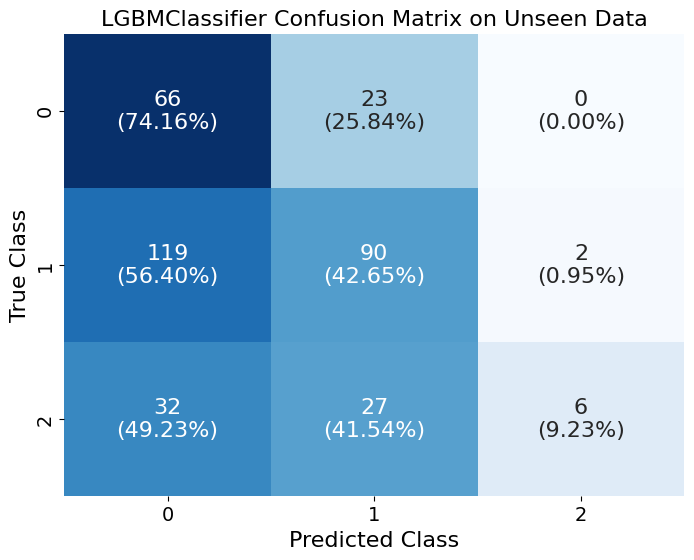

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def my_confusion(Classifier, confusion_matrix, data_type):
    # Normalize the confusion matrix
    row_sums = confusion_matrix.sum(axis=1, keepdims=True)
    normalized_confusion_matrix = confusion_matrix / row_sums * 100  # Convert to percentages

    # Increase font sizes
    plt.rcParams.update({'font.size': 14})
    plt.rcParams.update({'axes.titlesize': 18, 'axes.labelsize': 16, 'xtick.labelsize': 14, 'ytick.labelsize': 14})

    # Create annotations with both raw data and percentages
    annotations = np.empty_like(confusion_matrix).astype(str)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            annotations[i, j] = f'{confusion_matrix[i, j]}\n({normalized_confusion_matrix[i, j]:.2f}%)'

    # Plotting the confusion matrix with both raw data and normalized data
    plt.figure(figsize=(8, 6))
    sns.heatmap(normalized_confusion_matrix , annot=annotations, fmt="", cmap="Blues", cbar=False, 
                xticklabels=['0', '1', '2'],
                yticklabels=['0', '1', '2'],
                annot_kws={"size": 16})

    plt.xlabel('Predicted Class', fontsize=16)
    plt.ylabel('True Class', fontsize=16)
    plt.title(f'{Classifier} Confusion Matrix {data_type}', fontsize=16)
    plt.show()

Classifier = 'LGBMClassifier'
data_type = 'on Unseen Data'
# Given confusion matrix
confusion_matrix = np.array([[ 66,  23,   0],
                             [119,  90,   2],
                             [ 32,  27,   6]])

my_confusion(Classifier, confusion_matrix, data_type)